# Minimal Left Right Symmetric models with Higgs doublets

In this notebook we work the potential of MLRSM with Higgs doublets 

In [1]:
from sympy import symbols, init_printing, Matrix, I, sqrt, conjugate, trace, factor, simplify
from sympy.physics import msigma 
init_printing()

## Scalars

### Bidoublet

In [2]:
phi1p = symbols(r'{{\phi_1^+}}')
phi2p = symbols(r'{{\phi_2^+}}')

phi10, phi20 = symbols(r'\phi_1^0, \phi_2^0')

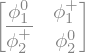

In [3]:
Phi = Matrix(
    [
        [phi10, phi1p],
        [conjugate(phi2p), phi20]
    ]
)
Phi

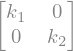

In [4]:
k1, k2 = symbols(r"k_1, k_2", positive=True)
sqrt2 = sqrt(2)
vevPhi = {phi10:k1, phi20:k2, phi1p:0, phi2p:0}
Phi.subs(vevPhi)

### Doublets

In [5]:
chiL0 = symbols(r'\chi_L^0')
chiR0 = symbols(r'\chi_R^0')

chiLp = symbols(r'{{\chi_L^+}}')
chiRp = symbols(r'{{\chi_R^+}}')

In [6]:
ChiL = Matrix(
    [
        [chiLp],
        [chiL0]
    ]
)

ChiR = Matrix(
    [
        [chiRp],
        [chiR0]
    ]
)

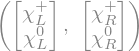

In [7]:
ChiL, ChiR

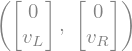

In [8]:
vL, vR = symbols(r'v_L, v_R', positive=True)
vevL = {chiL0:vL, chiLp:0}
vevR = {chiR0:vR, chiRp:0}
ChiL.subs(vevL), ChiR.subs(vevR)

## Scalar potential

In [9]:
from sympy.physics.quantum import Dagger
from sympy import solve

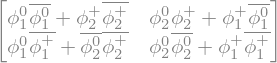

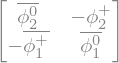

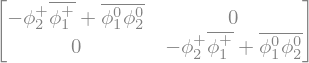

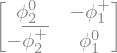

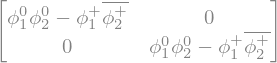

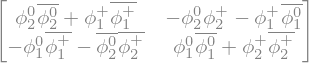

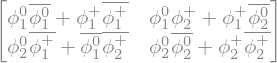

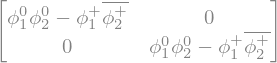

In [10]:
PhiDagger = Dagger(Phi)
#PhiDagger
PhiDaggerPhi = PhiDagger*Phi
display(PhiDaggerPhi)
Phitilde = (msigma(2)*conjugate(Phi)*msigma(2))
#Phitilde
display(Phitilde)
PhitildeDagger = Dagger(Phitilde)
PhiDaggerPhitilde = PhiDagger*Phitilde
display(PhiDaggerPhitilde)
#PhitildeDagger
display(PhitildeDagger)
PhitildeDaggerPhi = PhitildeDagger*Phi
display(PhitildeDaggerPhi)
PhitildeDaggerPhitilde = PhitildeDagger*Phitilde
display(PhitildeDaggerPhitilde)
PhiPhiDagger = Phi*PhiDagger
display(PhiPhiDagger)
PhiPhitildeDagger = Phi*PhitildeDagger
display(PhiPhitildeDagger)

In [11]:
ChiLDagger = Dagger(ChiL)
ChiRDagger = Dagger(ChiR)

ChiLDaggerChiL = (ChiLDagger*ChiL)[0]
display(ChiLDaggerChiL)
ChiRDaggerChiR = (ChiRDagger*ChiR)[0]
display(ChiRDaggerChiR)

In [12]:
mu12, mu22 = symbols(r'\mu_1^2, \mu_2^2', real=True)
lamb1, lamb2, lamb3, lamb4, lamb5, lamb6 = symbols(r'\lambda_1, \lambda_2, \lambda_3, \lambda_4, \lambda_5, \lambda_6', real=True)
alpha1, alpha2, alpha3 = symbols(r'\alpha_1, \alpha_2, \alpha_3', real=True)
rho1, rho2,= symbols(r'\rho_1, \rho_2', real=True)


In [13]:
#conjugate(trace(PhiDaggerPhitilde*PhiDaggerPhitilde))

In [14]:
#trace(PhitildeDaggerPhi*PhitildeDaggerPhi)

In [15]:
V = (
    - mu12*trace(PhiDaggerPhi)
    + lamb1*trace(PhiDaggerPhi)**2
    + lamb2*trace(PhiDaggerPhi*PhiDaggerPhi)
    + lamb3/2*(trace(PhiDaggerPhitilde) + trace(PhitildeDaggerPhi))**2
    + lamb4/2*(trace(PhiDaggerPhitilde) - trace(PhitildeDaggerPhi))**2
    + lamb5*trace(PhiDaggerPhi*PhitildeDaggerPhitilde)
    + lamb6/2*(trace(PhiDaggerPhitilde*PhiDaggerPhitilde) + conjugate(trace(PhiDaggerPhitilde*PhiDaggerPhitilde)))
    - mu22*(ChiLDaggerChiL + ChiRDaggerChiR)
    + rho1*(ChiLDaggerChiL**2 + ChiRDaggerChiR**2)
    + rho2*(ChiLDaggerChiL*ChiRDaggerChiR)
    + alpha1*trace(PhiDaggerPhi)*(ChiLDaggerChiL + ChiRDaggerChiR)
    + alpha2*(
        ChiLDagger*Phi*PhiDagger*ChiL
        + ChiRDagger*PhiDagger*Phi*ChiR
    )[0]
    + alpha3*(
        ChiLDagger*Phitilde*PhitildeDagger*ChiL
        + ChiRDagger*PhitildeDagger*Phitilde*ChiR
    )[0]
)

In [16]:
vevR

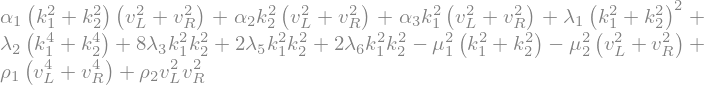

In [17]:
VLRPhi_vev = V.subs(vevL).subs(vevR).subs(vevPhi).simplify()#.collect([mu12, mu22, mu32, lamb2, rho1, beta2], factor)#.subs(k1ri)
VLRPhi_vev

### Tadpole conditions

In [18]:
scalar_vevs = [k1, k2, vL, vR]
tadpoles_relations = {}
for vev in scalar_vevs:
    tadpoles_relations[vev] = VLRPhi_vev.diff(vev).factor()

In [19]:
for muij, tadpole in tadpoles_relations.items():
    display(muij)
    tadpole_simplified = tadpole.collect([k1, k2, vL, vR], factor)
    display(tadpole_simplified)

In [20]:
tadpoles_relations[k1]

In [21]:
tadpoles_relations[vR].subs(k2,0).subs(vL, 0)

In [22]:
tadpole12_sol = solve([tadpoles_relations[k1], tadpoles_relations[vR]], [mu12, mu22], dict=True)[0]
tadpole12_sol

In [23]:
tadpoles_relations_simplified = {}
for muij, tadpole in tadpole12_sol.items():
    display(muij)
    tadpole_simplified = tadpole.collect([k1, k2, vL, vR], factor).subs(k2,0).subs(vL, 0) # remove vL and vR
    display(tadpole_simplified)
    tadpoles_relations_simplified[muij] = tadpole_simplified

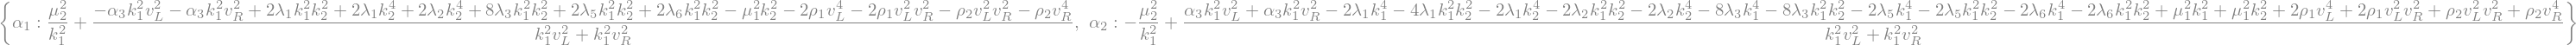

In [24]:
tadpole12_sol_2L = solve([tadpoles_relations[k2], tadpoles_relations[vL]], [alpha1, alpha2, mu22], dict=True)[0]
tadpole12_sol_2L

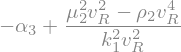

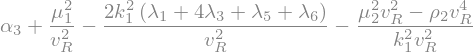

In [25]:
tadpoles_relations_simplified_2L = {}
for muij, tadpole in tadpole12_sol_2L.items():
    display(muij)
    tadpole_simplified = tadpole.expand().collect([k1, k2, vL, vR], factor).subs(k2,0).subs(vL, 0)
    display(tadpole_simplified)
    tadpoles_relations_simplified_2L[muij] = tadpole_simplified

## Mass matrices

In [26]:
phi10r, phi10i = symbols(r'\phi_1^{0r}, \phi_1^{0i}', real=True)
phi20r, phi20i = symbols(r'\phi_2^{0r}, \phi_2^{0i}', real=True)
chiR0r, chiR0i = symbols(r'\chi_R^{0r}, \chi_R^{0i}', real=True)
chiL0r, chiL0i = symbols(r'\chi_L^{0r}, \chi_L^{0i}', real=True)
complex_scalar_fields = {
    phi10: (k1 + phi10r + I*phi10i),
    phi20: (k2 + phi20r + I*phi20i),
    chiR0: (vR + chiR0r + I*chiR0i),
    chiL0: (vL + chiL0r + I*chiL0i)
}

In [27]:
VLRPhi_ri = V.subs(complex_scalar_fields)

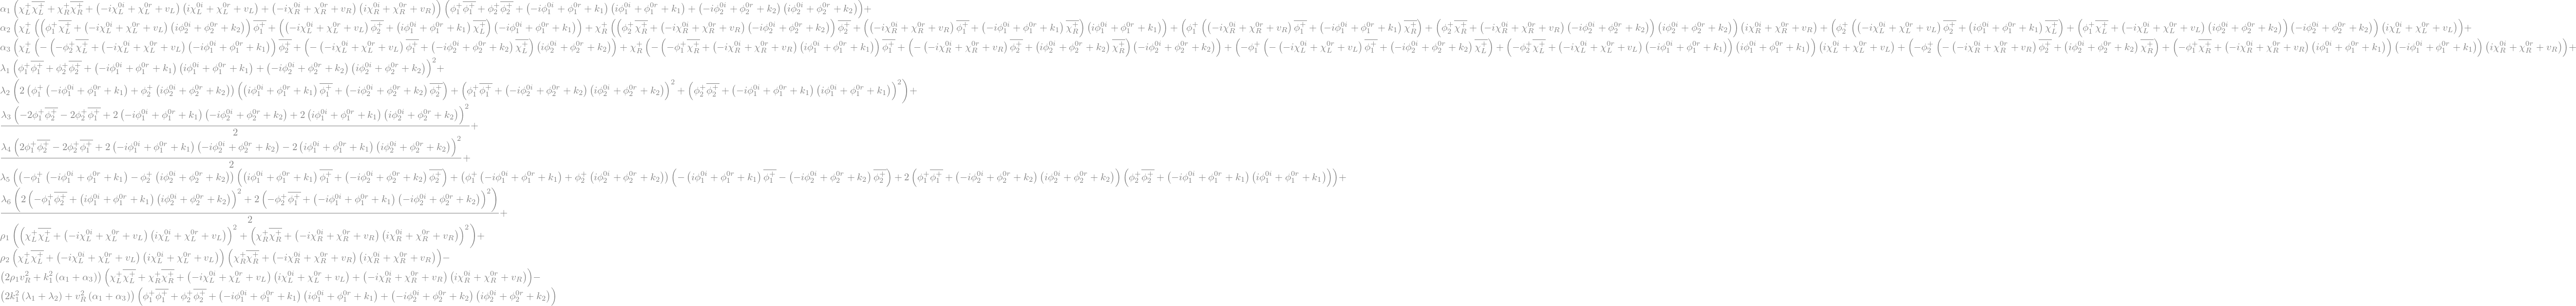

In [28]:
VLRPhi_ri_tadpole_caso1 = VLRPhi_ri.subs(tadpoles_relations_simplified)
VLRPhi_ri_tadpole_caso1

In [29]:
vevPhi[phi10r] = 0#vevPhi[phi10]
vevPhi[phi10i] = 0
vevPhi[phi20r] = 0#vevPhi[phi20]
vevPhi[phi20i] = 0

In [30]:
vevL[chiL0r] = 0#vevL[deltaL0]
vevL[chiL0i] = 0
vevR[chiR0r] = 0#vevR[deltaR0]
vevR[chiR0i] = 0

In [31]:
from sympy import derive_by_array

In [32]:
def build_mass_matrix(potential, fields1, fields2):
    """
    Build the mass matrix for a given potential and fields.
    """
    # Initialize the mass matrix
    Matrix_elements = derive_by_array(derive_by_array(potential, fields1), fields2)

    return Matrix_elements.tomatrix()

### Charged scalar mass matrix

In [33]:
from sympy import Dummy

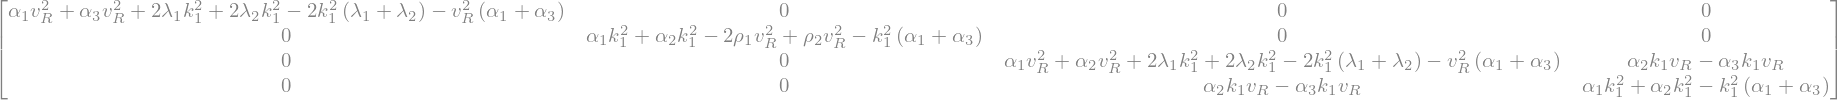

In [34]:
phip_fields = [phi2p, chiLp, phi1p, chiRp]

dummyconjugate1p = Dummy(r'\phi_1^{+,d}')
dummyconjugate2p = Dummy(r'\phi_2^{+,d}')
dummyconjugateRp = Dummy(r'\chi_R^{+,d}')
dummyconjugateLp = Dummy(r'\chi_L^{+,d}')

dummychangep = {
    conjugate(phi1p):dummyconjugate1p,
    conjugate(phi2p):dummyconjugate2p,
    conjugate(chiRp):dummyconjugateRp,
    conjugate(chiLp):dummyconjugateLp
}
phim_fields = [dummyconjugate2p, dummyconjugateLp, dummyconjugate1p, dummyconjugateRp] 
Mp_square = (derive_by_array(derive_by_array(VLRPhi_ri_tadpole_caso1.subs(dummychangep), phim_fields), phip_fields)).subs(
    {value:key for key, value in dummychangep.items()}
).subs(
    vevPhi
).subs(vevL).subs(vevR).subs(k2,0).subs(vL, 0)
Mp_square

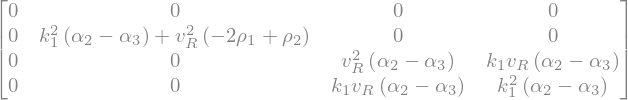

In [35]:
Mp_square = Mp_square.applyfunc(lambda x:x.collect([k1, vR], factor)).tomatrix()
Mp_square

In [36]:
from sympy import eye

In [37]:
z = symbols('z')
poly_p = (Mp_square - z*eye(4)).det()
eigenvals_p = solve(poly_p.expand().factor(), z, dict=True)

In [38]:
eigenvals_p

In [39]:
x1, x2, x3, x4 = symbols('x_1, x_2, x_3, x_4')
x = Matrix(
    [
        [x1],
        [x2],
        [x3],
        [x4]
    ]
)

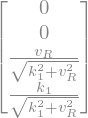

In [40]:
eigevector_sol3 = solve((Mp_square - eigenvals_p[1][z]*eye(4)).applyfunc(factor)*x, [x1, x2, x3, x4], dict=True)[0]
#eigevector_sol1
eigevector3 = x.subs(eigevector_sol3).subs(x4,1)
eigevector3 = (eigevector3/eigevector3.norm()).applyfunc(factor)
eigevector3

In [41]:
eigevector_sol2 = solve((Mp_square - eigenvals_p[2][z]*eye(4)).applyfunc(factor)*x, [x1, x2, x3, x4], dict=True)[0]
eigevector_sol2


In [42]:
eigevector2 = x.subs(eigevector_sol2).subs(x2,1)
eigevector2 = (eigevector2/eigevector2.norm()).applyfunc(factor)
eigevector2

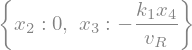

In [43]:
eigevector_sol4 = solve((Mp_square - eigenvals_p[0][z]*eye(4)).applyfunc(factor)*x, [x1, x2, x3, x4], dict=True)[0]
eigevector_sol4

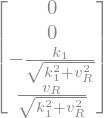

In [44]:
eigevector4 = x.subs(eigevector_sol4).subs(x4,1).subs(x1,0)
eigevector4 = (eigevector4/eigevector4.norm()).applyfunc(factor)
eigevector4

In [45]:
eigevector_sol1 = solve([x.dot(eigevector2), x.dot(eigevector3), x.dot(eigevector4)], [x1, x2, x3, x4] , dict=True)[0]
eigevector_sol1

In [46]:
eigevector1 = x.subs(eigevector_sol1).subs(x1,1)
eigevector1 = (eigevector1/eigevector1.norm()).applyfunc(factor)
eigevector1

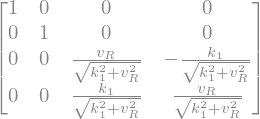

In [47]:
Pp = Matrix.hstack(eigevector1, eigevector2, eigevector3, eigevector4)
Pp

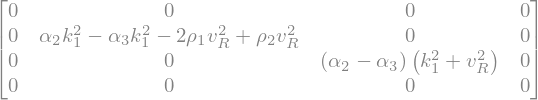

In [48]:
Dp = (Pp.T*Mp_square*Pp).applyfunc(factor)
Dp

In [49]:
Ppinv = Pp.T

In [50]:
Ppinv = Ppinv.applyfunc(lambda x:x.collect([k1, vR], factor))

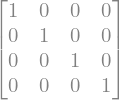

In [51]:
(Pp*Ppinv).applyfunc(factor)

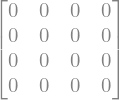

In [52]:
((Pp*Dp*Ppinv).applyfunc(factor) - Mp_square).applyfunc(factor)

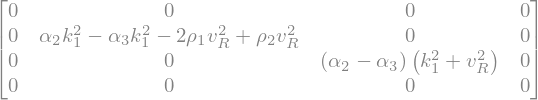

In [53]:
(Ppinv*Mp_square*Pp).applyfunc(factor)

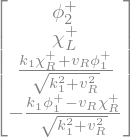

In [67]:
physical_charged_scalars_plus = (Ppinv*Matrix(phip_fields)).applyfunc(factor)
physical_charged_scalars_plus

In [68]:
phi2m, phi1m, chiLm, chiRm = symbols(r'\phi_1^-, \phi_2^-, \chi_L^-, \chi_R^-')

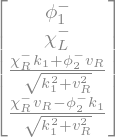

In [69]:
physical_charged_scalars_minus = (Ppinv*Matrix(phip_fields).subs(
    {
        phi1p: phi1m,
        phi2p: phi2m,
        chiLp: chiLm,
        chiRp: chiRm,
    }
)).applyfunc(factor)
physical_charged_scalars_minus

Pp

In [70]:
from sympy import Eq

In [71]:
GRp = symbols(r'{{G_R^+}}')
HRp = symbols(r'{{H_R^+}}')
eqHRp = Eq(HRp, physical_charged_scalars_plus[2])
eqGRp = Eq(GRp, physical_charged_scalars_plus[3])

GRm = symbols(r'{{G_R^-}}')
HRm = symbols(r'{{H_R^-}}')
eqHRm = Eq(HRm, physical_charged_scalars_minus[2])
eqGRm = Eq(GRm, physical_charged_scalars_minus[3])

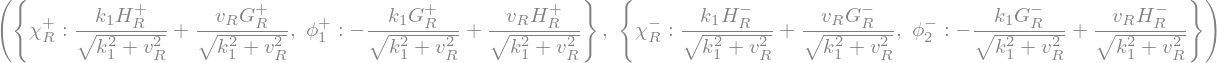

In [72]:
change_charged_higgs_plus = solve([eqGRp, eqHRp], [phi1p, chiRp])
change_charged_higgs_minus = solve([eqGRm, eqHRm], [phi1m, chiRm])
change_charged_higgs_plus, change_charged_higgs_minus

In [73]:
GLp = symbols(r'{{G_L^+}}')
HLp = symbols(r'{{H_L^+}}')
change_charged_higgs_plus[phi2p] = GLp
change_charged_higgs_plus[chiLp] = HLp

GLm = symbols(r'{{G_L^-}}')
HLm = symbols(r'{{H_L^-}}')
change_charged_higgs_minus[phi2m] = GLm
change_charged_higgs_minus[chiLm] = HLm

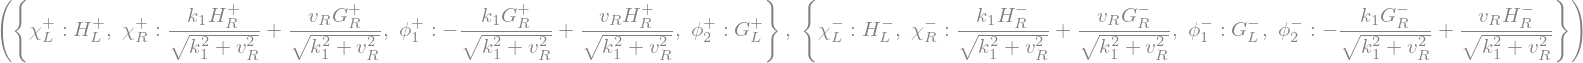

In [74]:
change_charged_higgs_plus, change_charged_higgs_minus

In [75]:
change_charged_higgs = {
    **change_charged_higgs_plus,
    **change_charged_higgs_minus
}

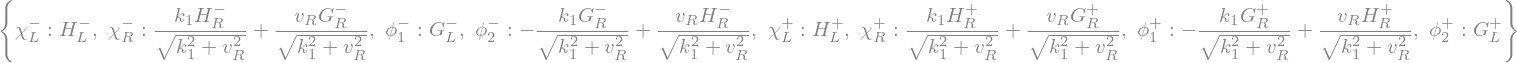

In [76]:
change_charged_higgs

In [77]:
VLRPhi_ri_tadpole_caso1_physical = VLRPhi_ri_tadpole_caso1.subs(change_charged_higgs)

In [79]:
vev_physical_charged_scalars = {
    GLp:0, GRp:0, HLp:0, HRp:0,
    GLm:0, GRm:0, HLm:0, HRm:0
}

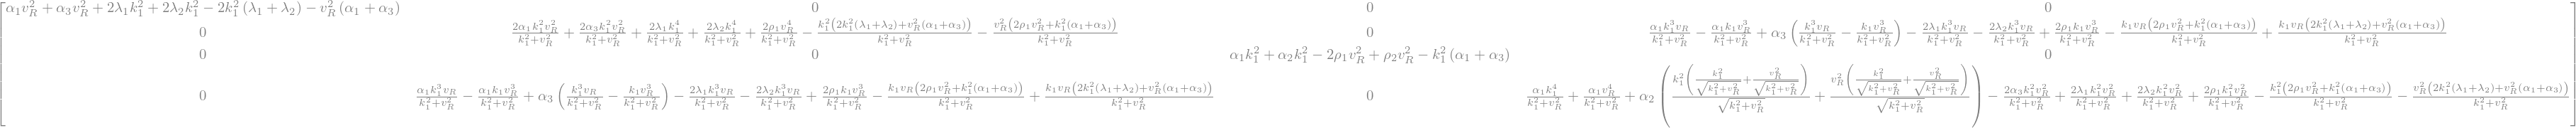

In [80]:
phip_fields = [GLp, GRp, HLp, HRp]

dummyconjugateGLp = Dummy(r'G_L^{+,d}')
dummyconjugateGRp = Dummy(r'G_R^{+,d}')
dummyconjugateHRp = Dummy(r'H_R^{+,d}')
dummyconjugateHLp = Dummy(r'H_L^{+,d}')

dummychangep = {
    conjugate(GLp):dummyconjugateGLp,
    conjugate(GRp):dummyconjugateGRp,
    conjugate(HRp):dummyconjugateHRp,
    conjugate(HLp):dummyconjugateHLp
}
phim_fields = [dummyconjugateGLp, dummyconjugateGRp, dummyconjugateHLp, dummyconjugateHRp] 
Mp_square_physical = (derive_by_array(derive_by_array(VLRPhi_ri_tadpole_caso1_physical.subs(dummychangep), phim_fields), phip_fields)).subs(
    {value:key for key, value in dummychangep.items()}
).subs(
    vevPhi
).subs(vevL).subs(vevR).subs(k2,0).subs(vL, 0).subs(vev_physical_charged_scalars)
Mp_square_physical

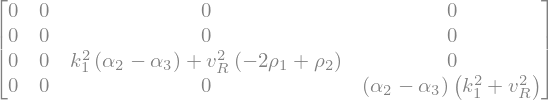

In [81]:
Mp_square_physical = Mp_square_physical.applyfunc(factor).applyfunc(lambda x:x.collect([k1, vR], factor))
Mp_square_physical

In [82]:
mHL, mHR = symbols('m_{H_L^+}, m_{H_R^+}', positive=True)

In [83]:

alpha12_rho12_masses_relations = solve(
    [
        mHL**2 - Mp_square_physical[2,2],
        mHR**2 - Mp_square_physical[3,3]
    ],
    [alpha2-alpha3, rho2-2*rho1], dict=True
)[0]

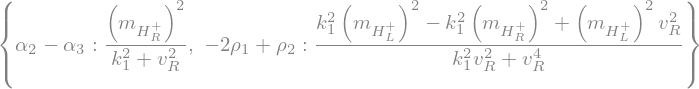

In [84]:
alpha12_rho12_masses_relations

In [85]:
for param, exp in alpha12_rho12_masses_relations.items():
    exp_factor = exp.factor()
    #display(exp_factor)
    alpha12_rho12_masses_relations[param] = exp_factor

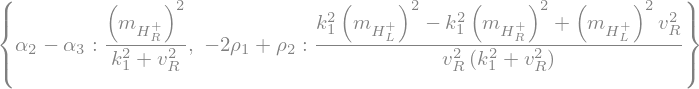

In [86]:
alpha12_rho12_masses_relations

### Neutral mass matrix

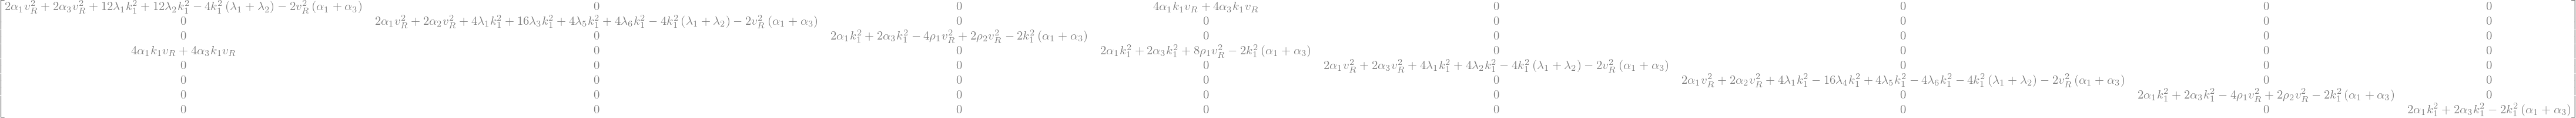

In [87]:
phir_fields = [phi10r, phi20r, chiL0r, chiR0r]
phii_fields = [phi10i, phi20i, chiL0i, chiR0i]
phiri_fields = phir_fields + phii_fields

MRI_square = (build_mass_matrix(VLRPhi_ri_tadpole_caso1, phiri_fields, phiri_fields)).subs(
    vevPhi
).subs(vevL).subs(vevR).subs(k2,0).subs(vL, 0)
MRI_square

### Pseudocalar and goldstone

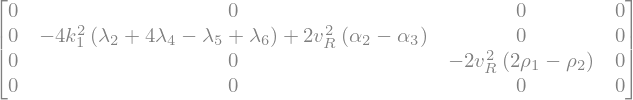

In [88]:
Mii = MRI_square[4:, 4:].applyfunc(lambda x:x.collect([k1, vR], factor))
Mii

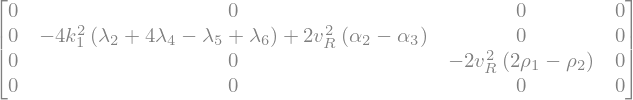

In [89]:
Mii

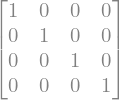

In [90]:
Pii = Matrix(
    [
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ]
)
Pii

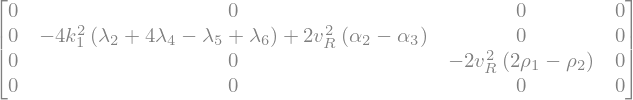

In [91]:
Dii = (Pii.T*Mii*Pii)
Dii

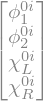

In [92]:
physical_pseudo_scalars = (Pii.T*Matrix(phii_fields)).applyfunc(factor)
physical_pseudo_scalars

In [93]:
A10 = symbols(r'{{A_1^0}}')
A20 = symbols(r'{{A_2^0}}')
GZ = symbols(r'{{G_Z}}')
GX = symbols(r'{{G_X}}')
eqA10 = Eq(A10, physical_pseudo_scalars[1])
eqA20 = Eq(A20, physical_pseudo_scalars[2])
eqGZ = Eq(GZ, physical_pseudo_scalars[0])
eqGX = Eq(GX, physical_pseudo_scalars[3])

In [94]:
change_pseudo_scalars = solve([eqA10, eqA20, eqGZ, eqGX], [chiL0i, chiR0i, phi10i, phi20i])
change_pseudo_scalars

In [95]:
mA10, mA20 = symbols('m_{A_1^0}, m_{A_2^0}', positive=True)
lamb2456 = lamb2 + 4*lamb4 - lamb5 + lamb6
lambdas2456_masses_relations = solve(
    [
        mA10**2 - Dii[1,1]
    ],
    [lamb2456], dict=True
)[0]

In [96]:
lambdas2456_masses_relations[lamb2456] = lambdas2456_masses_relations[lamb2456].factor()

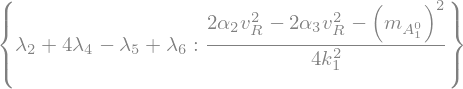

In [97]:
lambdas2456_masses_relations

In [98]:
rho12_relations = solve(
    [
        mA20**2 - Dii[2,2]
    ],
    [-2*rho1 + rho2], dict=True
)[0]

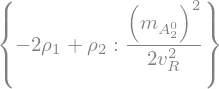

In [99]:
rho12_relations

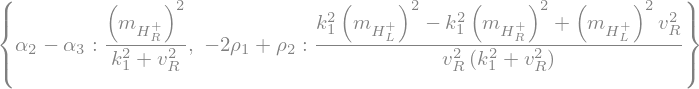

In [100]:
alpha12_rho12_masses_relations

### Scalars

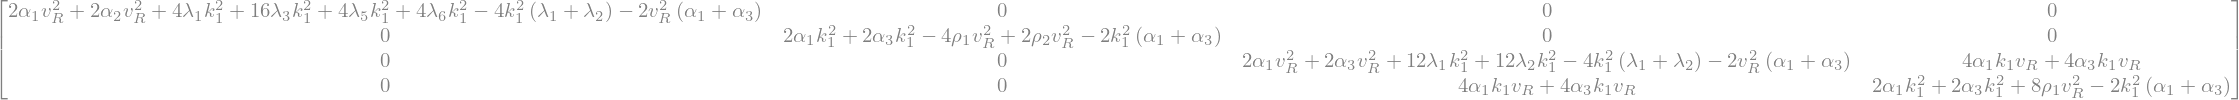

In [101]:
phir_fields = [phi20r, chiL0r, phi10r, chiR0r]

Mrr = (build_mass_matrix(VLRPhi_ri_tadpole_caso1, phir_fields, phir_fields)).subs(
    vevPhi
).subs(vevL).subs(vevR).subs(k2,0).subs(vL, 0)
Mrr

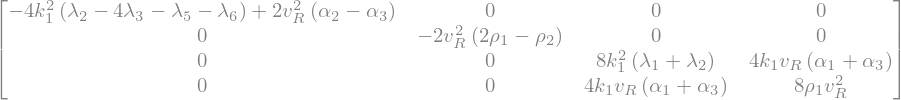

In [102]:
Mrr = Mrr.applyfunc(lambda x:x.collect([k1, vR], factor))
Mrr

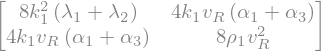

In [103]:
mrr_mix = Matrix(
    [
        [Mrr[2,2], Mrr[2,3]],
        [Mrr[3,2], Mrr[3,3]]
    ]
)
mrr_mix

In [104]:
from sympy import sin, cos, tan
th = symbols(r'\theta')

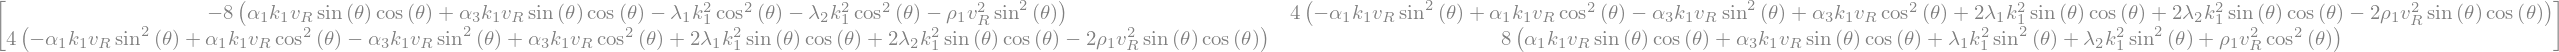

In [105]:
Oth = Matrix(
    [
        [cos(th), sin(th)],
        [-sin(th), cos(th)]
    ]
)

mrr_mix_rotate = (Oth.T*mrr_mix*Oth).applyfunc(factor)
mrr_mix_rotate

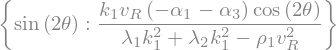

In [106]:
sin2th_sol = solve(mrr_mix_rotate[0,1].trigsimp(), sin(2*th), dict=True)[0]
sin2th_sol

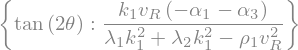

In [107]:
tan2th_sol = {tan(2*th): (sin(2*th)/cos(2*th)).subs(sin2th_sol)}
tan2th_sol

In [108]:
from sympy import series
epsilon = symbols(r'\epasilon')

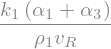

In [109]:
tan2th_approx = series(tan2th_sol[tan(2*th)].subs(k1, epsilon*vR), x=epsilon, x0=0, n=2).removeO().factor().subs(epsilon, k1/vR)
tan2th_approx

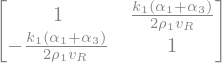

In [110]:
Oth_approx = Oth.subs(sin(th), tan2th_approx/2).subs(cos(th), 1)
Oth_approx


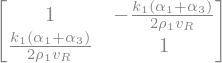

In [111]:
Oth_approx_inv = (Oth.T).subs(sin(th), tan2th_approx/2).subs(cos(th), 1)
Oth_approx_inv

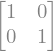

In [112]:
(Oth_approx_inv*Oth_approx).subs(k1, epsilon*vR).subs(epsilon, 0)

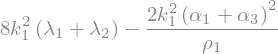

In [113]:
mH10_square = mrr_mix_rotate[0,0].subs(sin(th), tan2th_approx/2).subs(cos(th), 1).expand().collect(rho1, factor)
mH10_square

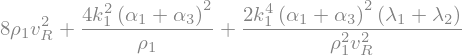

In [114]:
mH20_square = mrr_mix_rotate[1,1].subs(sin(th), tan2th_approx/2).subs(cos(th), 1).expand().collect(rho1, factor)
mH20_square

In [115]:
mH10, mH20, mH30, mH40 = symbols('m_{H_1^0}, m_{H_2^0}, m_{H_3^0}, m_{H_4^0}', positive=True)

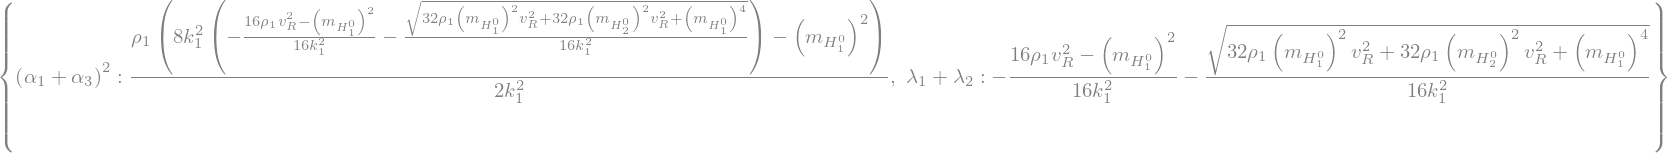

In [116]:
alpha13_lamb12_sol = solve(
    [
        Eq(mH10_square, mH10**2),
        Eq(mH20_square, mH20**2)
    ], 
    [(alpha1 + alpha3)**2, lamb1 + lamb2], dict=True
)[0]
alpha13_lamb12_sol

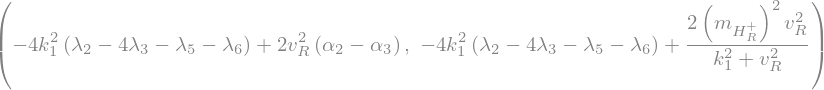

In [117]:
mH30_square = Mrr[0,0]
mH30_square, mH30_square.subs(alpha12_rho12_masses_relations)

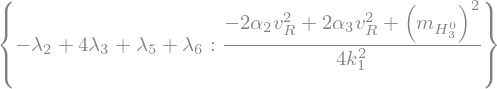

In [118]:
lamb2356_sol = solve(Eq(mH30_square, mH30**2), - lamb2 + 4*lamb3 + lamb5 + lamb6, dict=True)[0]
lamb2356_sol

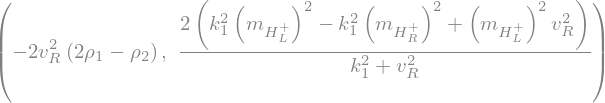

In [119]:
mH40_square = Mrr[1,1]
mH40_square, mH40_square.subs(alpha12_rho12_masses_relations)

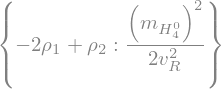

In [120]:
rho21_neutral_sol = solve(Eq(mH40_square, mH40**2), rho2 - 2*rho1, dict=True)[0]
rho21_neutral_sol

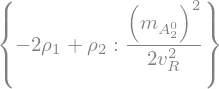

In [121]:
rho12_relations

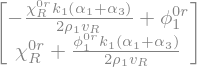

In [122]:
physical_scalars = Oth_approx_inv*Matrix(
    [
        [phi10r],
        [chiR0r]
    ]
)
physical_scalars

In [123]:
H10 = symbols(r'{{H_1^0}}')
H20 = symbols(r'{{H_2^0}}')
H30 = symbols(r'{{H_3^0}}')
H40 = symbols(r'{{H_4^0}}')
eqH10 = Eq(H10, physical_scalars[0])
eqH20 = Eq(H20, physical_scalars[1])
eqH30 = Eq(H30, phi20r)
eqH40 = Eq(H40, chiL0r)


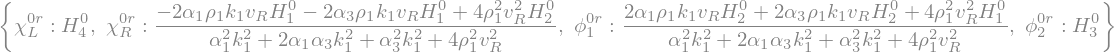

In [124]:
change_scalars = solve([eqH10, eqH20, eqH30, eqH40], [chiL0r, chiR0r, phi10r, phi20r], dict=True)[0]
change_scalars

In [125]:
for key, value in change_scalars.items():
    change_scalars[key] = value.factor(deep=True)

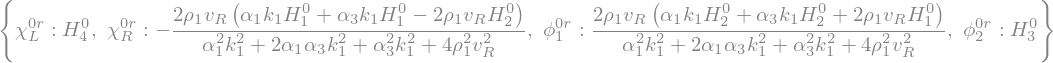

In [126]:
change_scalars

In [127]:
change_scalar_fields = {
    **change_scalars,
    **change_pseudo_scalars,
    **change_charged_higgs
}

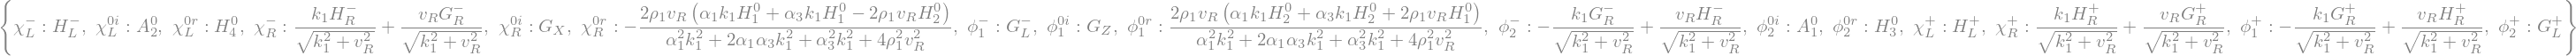

In [128]:
change_scalar_fields

# Gauge Higgs interactions

In [129]:
ChiL = ChiL.subs(complex_scalar_fields).subs(change_scalar_fields)
ChiR = ChiR.subs(complex_scalar_fields).subs(change_scalar_fields)

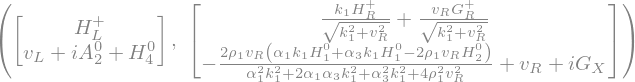

In [130]:
ChiL, ChiR

In [131]:
Phi = Phi.subs(complex_scalar_fields).subs(change_scalar_fields)

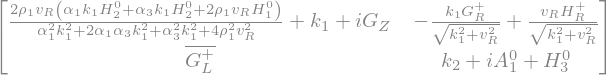

In [132]:
Phi

## Covariant derivative

### Higgs doublets 

In [133]:
from sympy import Add

In [134]:
g, gBL = symbols('g, g_{B-L}', positive=True)
W1L, W2L, W3L = symbols('W^1_L, W^2_L, W^3_L', real=True)
WL = [W1L, W2L, W3L]
W1R, W2R, W3R = symbols('W^1_R, W^2_R, W^3_R', real=True)
WR = [W1R, W2R, W3R]
Bmu = symbols(r'B_\mu', real=True)
B, L = symbols(r'B, L', real=True)

In [135]:
WsigmaL = Add(*[WL[i]*msigma(i+1) for i in range(3)])
WsigmaR = Add(*[WR[i]*msigma(i+1) for i in range(3)])

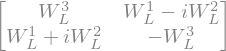

In [136]:
WsigmaL

In [137]:
WLp, WLm, WRp, WRm = symbols('W_L^+, W_L^-, W_R^+, W_R^-')
Wcharge_subs = {
    W1L - I*W2L:WLp,
    W1L + I*W2L:WLm,
    W1R - I*W2R:WRp,
    W1R + I*W2R:WRm
}

In [138]:
WsigmaL, WsigmaR = WsigmaL.subs(Wcharge_subs), WsigmaR.subs(Wcharge_subs)

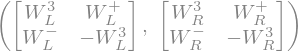

In [139]:
WsigmaL, WsigmaR

In [140]:
DmuL = -I*g/2*WsigmaL - I*gBL/2*Bmu*eye(2)
DmuR = -I*g/2*WsigmaL - I*gBL/2*Bmu*eye(2)

In [141]:
Dmu_ChiL = DmuL*ChiL 
Dmu_ChiR = DmuR*ChiR

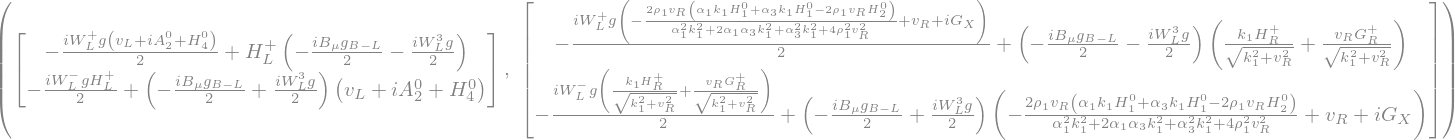

In [142]:
Dmu_ChiL, Dmu_ChiR

In [143]:
HLm = symbols('{{H_L^-}}')
HRm = symbols('{{H_R^-}}')
GLm = symbols('{{G_L^-}}')
GRm = symbols('{{G_R^-}}')

In [144]:
conjugate_fields = {
    conjugate(HLp):HLm,
    conjugate(HLm):HLp,
    conjugate(HRm):HRp,
    conjugate(HRp):HRm,
    conjugate(GLp):GLm,
    conjugate(GLm):GLp,
    conjugate(GRm):GRp,
    conjugate(GRp):GRm,
    conjugate(WLp):WLm,
    conjugate(WLm):WLp,
    conjugate(WRm):WRp,
    conjugate(WRp):WRm,
    conjugate(H10):H10,
    conjugate(H20):H20,
    conjugate(H30):H30,
    conjugate(H40):H40,
    conjugate(A10):A10,
    conjugate(A20):A20,
    conjugate(GZ):GZ,
    conjugate(GX):GX,
}

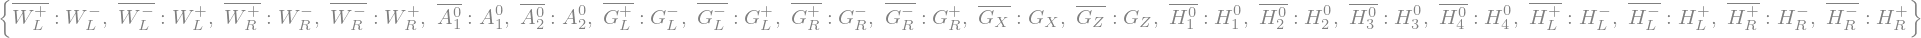

In [145]:
conjugate_fields

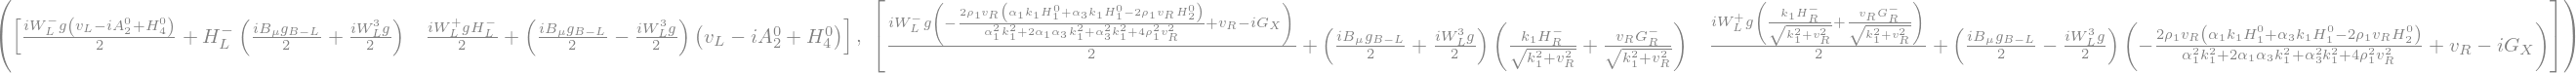

In [146]:
Dmu_ChiL_dagger = Dagger(Dmu_ChiL).subs(conjugate_fields)
Dmu_ChiR_dagger = Dagger(Dmu_ChiR).subs(conjugate_fields)

Dmu_ChiL_dagger, Dmu_ChiR_dagger

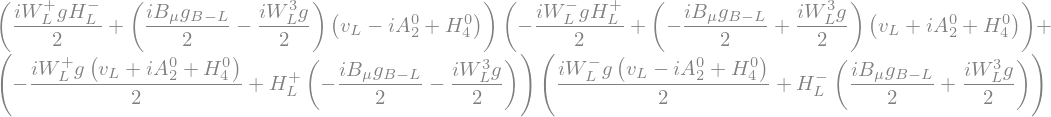

In [147]:
Dmu_ChiL_square = (Dmu_ChiL_dagger*Dmu_ChiL)[0]
Dmu_ChiL_square


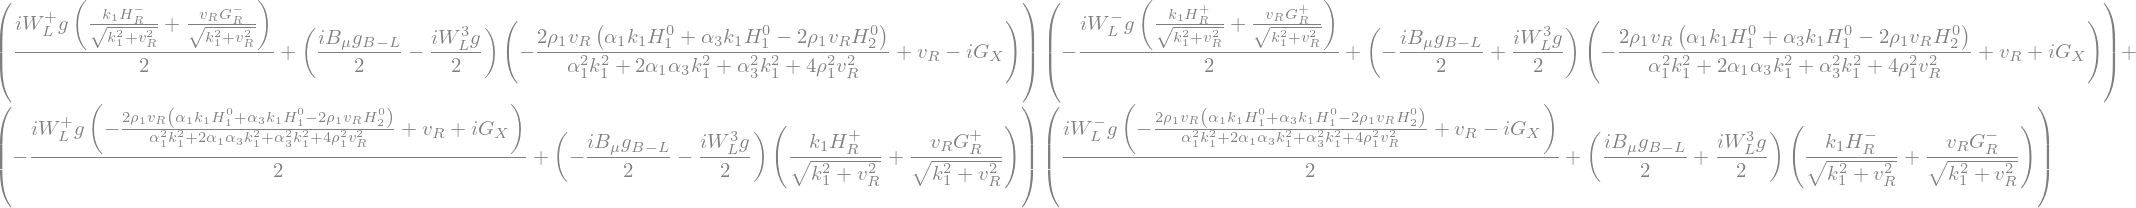

In [148]:
Dmu_ChiR_square = (Dmu_ChiR_dagger*Dmu_ChiR)[0]
Dmu_ChiR_square

### Bidoublet

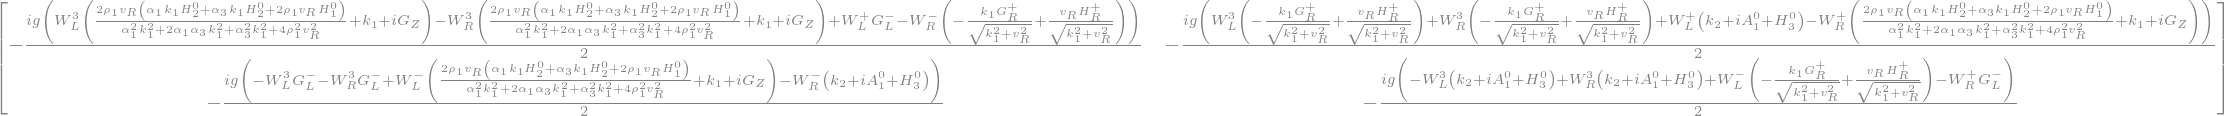

In [149]:
Dmu_Phi = -I*g/2*(WsigmaL*Phi - Phi*WsigmaR).subs(conjugate_fields) # B - L = 0 for the bidoublet
Dmu_Phi

In [150]:
phi1m = symbols(r'{{\phi_1^-}}')
phi2m = symbols(r'{{\phi_2^-}}')

In [151]:
conjugate_scalarsPhi = {
    conjugate(phi1p):phi1m,
    conjugate(phi2p):phi2m,
    conjugate(phi1m):phi1p,
    conjugate(phi2m):phi2p
}

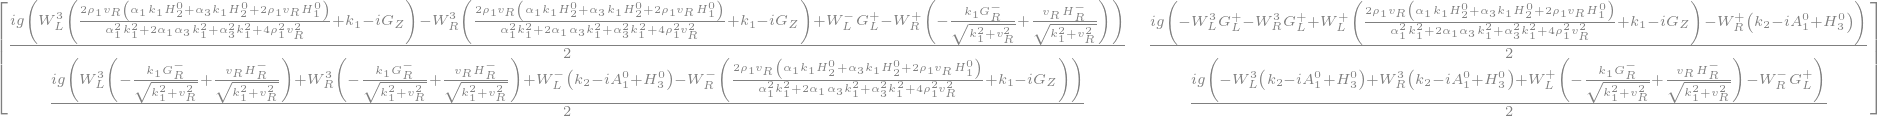

In [152]:
Dmu_Phi_dagger = Dagger(Dmu_Phi).subs(conjugate_scalarsPhi).subs(conjugate_fields)
Dmu_Phi_dagger

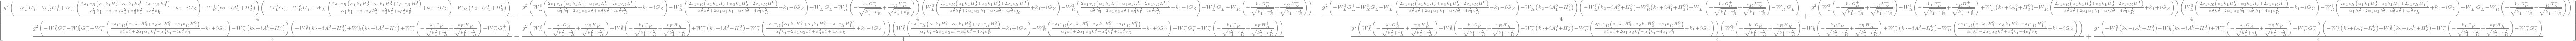

In [153]:
Dmu_Phi_Dmu = (Dmu_Phi_dagger*Dmu_Phi).subs(vevPhi)
Dmu_Phi_Dmu

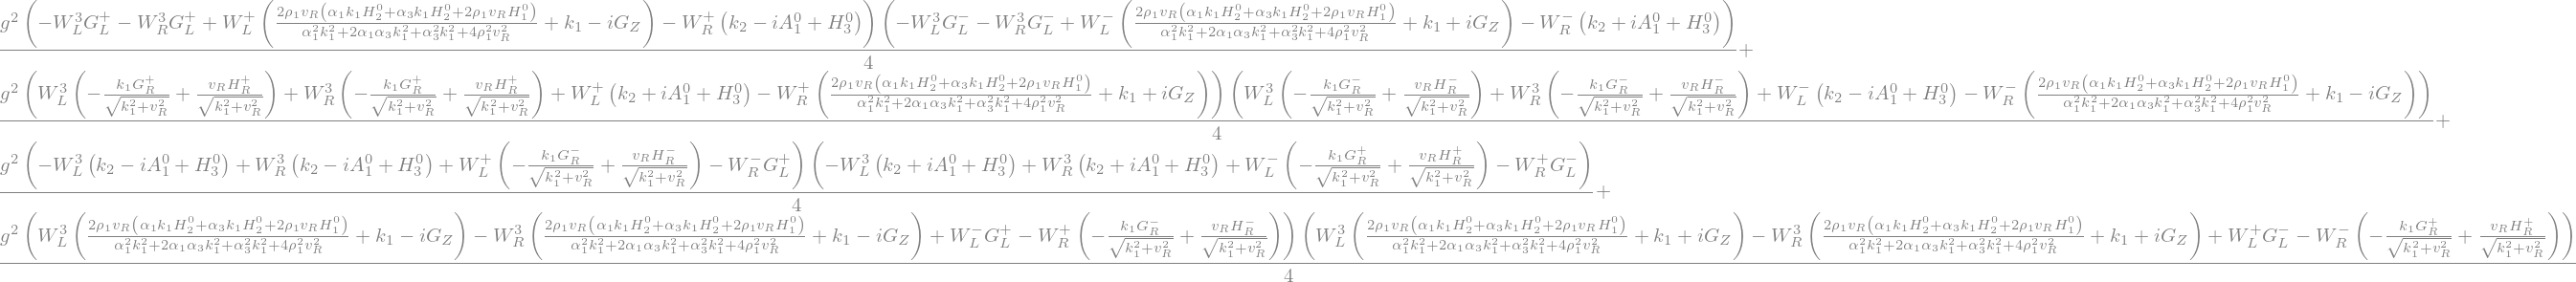

In [154]:
Tr_DmuPhi = trace(Dmu_Phi_Dmu)
Tr_DmuPhi 

## Kinetic Lagrangian of scalars

In [155]:
LHiggs = Dmu_ChiL_square + Dmu_ChiR_square + Tr_DmuPhi 

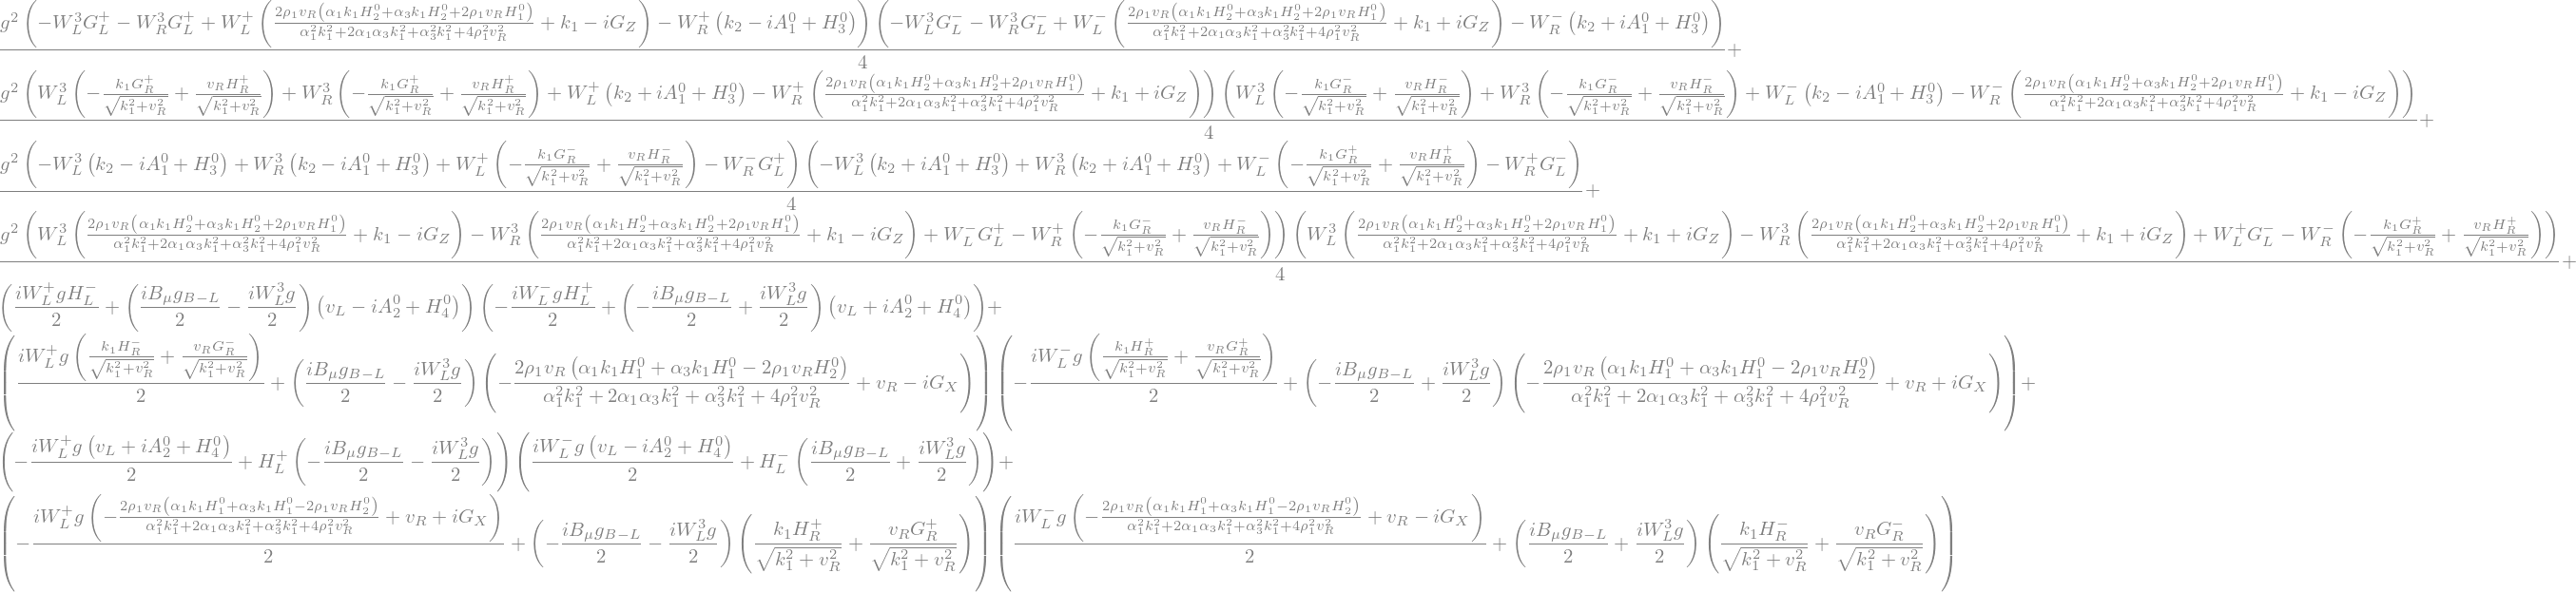

In [156]:
LHiggs

### $W^\pm$ mass matrix

In [157]:
vev_physical_charged_scalars

In [158]:
vev_physical_charged_scalars[GLm] = 0
vev_physical_charged_scalars[GRm] = 0
vev_physical_charged_scalars[HLm] = 0
vev_physical_charged_scalars[GLm] = 0
vev_physical_charged_scalars[A10] = 0
vev_physical_charged_scalars[A20] = 0
vev_physical_charged_scalars[H10] = 0
vev_physical_charged_scalars[H20] = 0
vev_physical_charged_scalars[H30] = 0
vev_physical_charged_scalars[H40] = 0
vev_physical_charged_scalars[GZ] = 0
vev_physical_charged_scalars[GX] = 0

In [159]:
vev_physical_charged_scalars

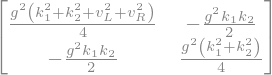

In [160]:
MW11 = LHiggs.diff(WLm, WLp)
MW12 = LHiggs.diff(WLm, WRp)
MW21 = LHiggs.diff(WRm, WLp)
MW22 = LHiggs.diff(WRm, WRp)

MW = Matrix(
    [
        [MW11, MW12],
        [MW21, MW22]
    ]
).subs(vev_physical_charged_scalars).subs(vevL).subs(vevR)
MW

Then, we have a mixing amon two charged gauge bosons
$$\begin{aligned}
& W_L^{+}=W_{\mathrm{1}}^{+} \cos \xi+W_{\mathrm{2}}^{+} \sin \xi \\
& W_R^{+}=-W_{\mathrm{1}}^{+} \sin \xi+W_{\mathrm{2}}^{+} \cos \xi
\end{aligned}$$

In [161]:
zeta = symbols(r'\xi', positive=True)
W1p, W2p = symbols('W_1^+, W_2^+')
W1m, W2m = symbols('W_1^-, W_2^-')

cx = cos(zeta)
sx = sin(zeta)
sx, cx
RW = Matrix(
    [
        [cx, sx],
        [-sx, cx]
    ]
)
RW
W12p_doublet = Matrix(
    [
        [W1p],
        [W2p]
    ]
)
W12p_doublet
mixingW12 = RW*W12p_doublet
mixingW12
WLp_mix = mixingW12[0]
WRp_mix = mixingW12[1]
WLp_mix, WRp_mix

In [162]:
change_charged_bosons = {
    WLp:WLp_mix, WRp:WRp_mix,
    WLm:WLp_mix.subs(W1p, W1m).subs(W2p, W2m), WRm:WRp_mix.subs(W1p, W1m).subs(W2p, W2m)
}
change_charged_bosons

### Neutral gaube bosons

In [163]:
WLWRB = [W3R, W3L, Bmu]
M0_square = derive_by_array(derive_by_array(LHiggs, WLWRB), WLWRB).simplify().tomatrix()/2
M0_square = M0_square.subs(vev_physical_charged_scalars).subs(vevL).subs(vevR)

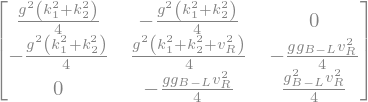

In [164]:
M0_square_vL0 = M0_square.applyfunc(factor).subs(vL,0)
M0_square_vL0

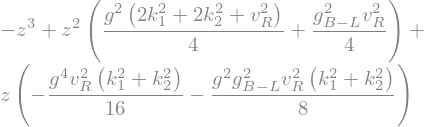

In [165]:
(M0_square_vL0 - z*eye(3)).det().collect(z, lambda x:x.collect([g, gBL], factor))

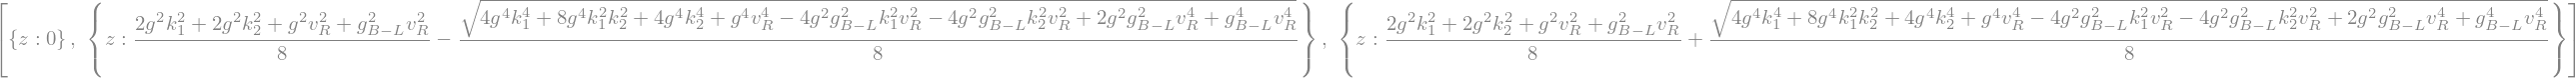

In [166]:
eigenvals_Z0 = solve((M0_square_vL0 - z*eye(3)).det().collect(z, factor), z, dict=True)
eigenvals_Z0

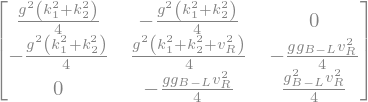

In [167]:
M0_square_vL0 - eigenvals_Z0[0][z]*eye(3)

In [168]:
k = symbols('k')
k_square_changes = {k1**2 + k2**2:k**2}
k_square_changes

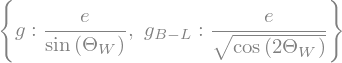

In [169]:
e = symbols('e', positive=True)
thw = symbols(r'\Theta_W', positive=True)
g_changes = {
    g:e/sin(thw),
    gBL:e/sqrt(cos(2*thw))
}
g_changes

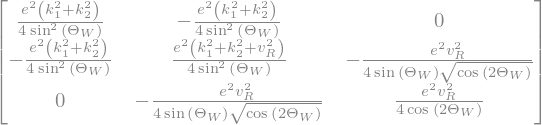

In [170]:
M0_square_vL0_thw = M0_square_vL0.subs(g_changes)#.subs(k_square_changes)
M0_square_vL0_thw

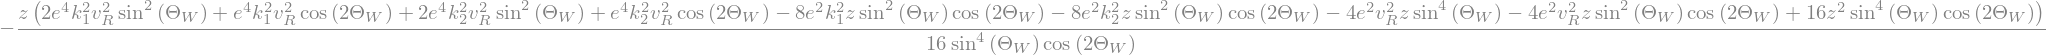

In [171]:
(M0_square_vL0_thw - z*eye(3)).det().factor()

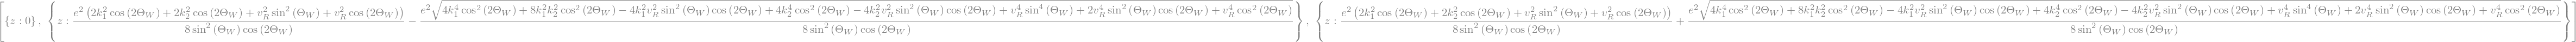

In [172]:
eigenvals_Z0_thw = solve((M0_square_vL0_thw - z*eye(3)).det().collect(z, factor), z, dict=True)
eigenvals_Z0_thw

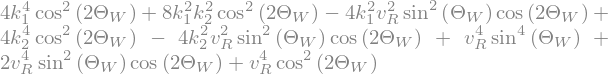

In [173]:
sqrt_Z0 = eigenvals_Z0_thw[1][z].args[0].args[2].args[0]#.collect([k, vR], lambda x:x.factor()).simplify()
sqrt_Z0

In [174]:
sqrt_Z0_factor = sqrt_Z0.collect([k, vR], lambda x:x.factor()).simplify()
sqrt_Z0_factor

In [175]:
eigenvals_Z0_thw[1][z] = eigenvals_Z0_thw[1][z].subs(sqrt_Z0, sqrt_Z0_factor)
eigenvals_Z0_thw[2][z] = eigenvals_Z0_thw[2][z].subs(sqrt_Z0, sqrt_Z0_factor)

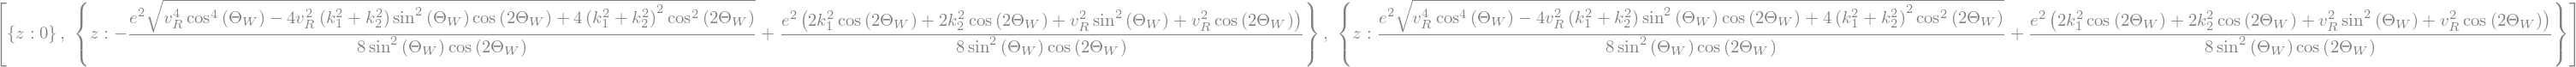

In [176]:
eigenvals_Z0_thw

In [177]:
y1, y2, y3 = symbols('y_1, y_2, y_3')
y = Matrix(
    [
        [y1],
        [y2],
        [y3]
    ]
)

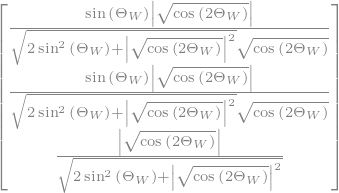

In [178]:
eigevectorZ0_sol = solve((M0_square_vL0_thw - eigenvals_Z0_thw[0][z]*eye(3)).applyfunc(factor)*y, [y1, y2, y3], dict=True)[0]
#eigevectorZ0_sol
eigevectorZ0_1 = y.subs(eigevectorZ0_sol).subs(y3,1)
#display(eigevectorZ0_1)
eigevectorZ0_1 = (eigevectorZ0_1/eigevectorZ0_1.norm()).applyfunc(factor)
eigevectorZ0_1


Solutions for (y1, y2, y3):


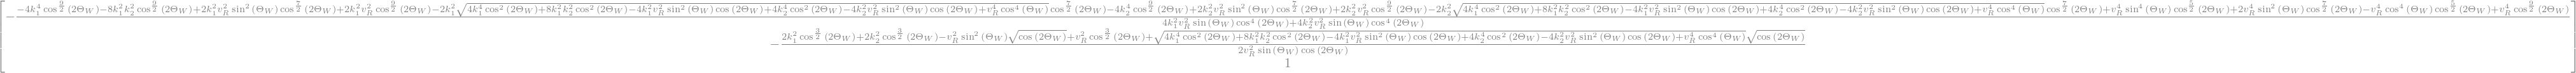

In [179]:
null_space = (M0_square_vL0_thw - eigenvals_Z0_thw[2][z]*eye(3)).nullspace()

print("\nSolutions for (y1, y2, y3):")
for vec in null_space:
    display(vec.subs(sqrt_Z0, sqrt_Z0_factor))

In [180]:
eigevectorZ0_sol2 = solve((M0_square_vL0_thw - eigenvals_Z0_thw[1][z]*eye(3)).applyfunc(factor)*y, [y1, y2, y3], dict=True)[0]
#eigevectorZ0_sol2
eigevectorZ0_2 = y.subs(eigevectorZ0_sol2)#.subs(y3,1)
#display(eigevectorZ0_2)
#eigevectorZ0_2 = (eigevectorZ0_2/eigevectorZ0_2.norm()).applyfunc(factor)
eigevectorZ0_2

In [181]:
eigevectorZ0_sol3 = solve((M0_square_vL0_thw - eigenvals_Z0_thw[2][z]*eye(3)).applyfunc(factor)*y, [y1, y2, y3], dict=True)[0]
#eigevectorZ0_sol3
eigevectorZ0_3 = y.subs(eigevectorZ0_sol3).subs(y3,1)
#display(eigevectorZ0_3)
#eigevectorZ0_3 = (eigevectorZ0_3/eigevectorZ0_3.norm()).applyfunc(factor)
eigevectorZ0_3

## Mixing among neutral gauge bosons

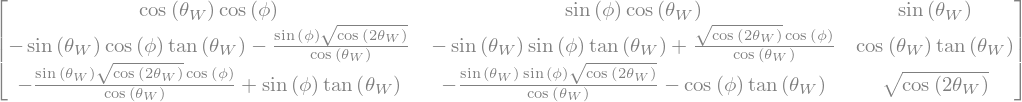

In [182]:
thw, phi = symbols(r'\theta_W, phi')
cw, sw = cos(thw), sin(thw)
sM = tan(thw)
cM = sqrt(cos(2*thw))/cos(thw)
cphi, sphi = cos(phi), sin(phi)
R0 = Matrix(
    [
        [cw*cphi, cw*sphi, sw],
        [-sw*sM*cphi - cM*sphi, -sw*sM*sphi + cM*cphi, cw*sM],
        [-sw*cM*cphi + sM*sphi, -sw*cM*sphi - sM*cphi, cw*cM]
    ]
)
R0

In [183]:
Z1, Z2, A = symbols('Z1, Z2, A', real=True)

mixingZ12A = R0*Matrix([
    [Z1],
    [Z2],
    [A]
])

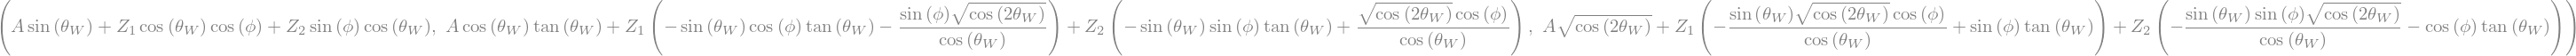

In [184]:
W3L_mix = mixingZ12A[0]
W3R_mix = mixingZ12A[1]
B_mix = mixingZ12A[2]

W3L_mix, W3R_mix, B_mix

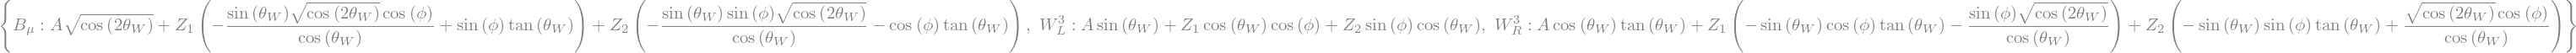

In [185]:
change_neutral_bosons = {W3L:W3L_mix, W3R:W3R_mix, Bmu:B_mix}
change_neutral_bosons

## Physical basis LHiggs

In [186]:
change_charged_bosons

In [187]:
LHiggs.free_symbols

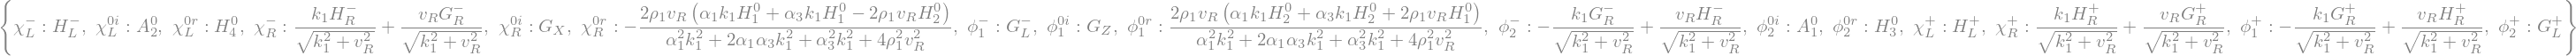

In [188]:
change_scalar_fields

In [189]:
LHiggs_physical = LHiggs.subs(change_charged_bosons).subs(change_neutral_bosons).expand()

In [190]:
LHiggs_physical.free_symbols

In [191]:
scalar_fields = list(vev_physical_charged_scalars.keys())
gauge_fields = [W1p, W2p, W1m, W2m, A, Z1, Z2]
fields = set(scalar_fields + gauge_fields)

In [222]:
parameters = (LHiggs_physical.free_symbols).difference(fields)
parameters

In [223]:
from sympy import Mul

In [225]:
expanded_L = LHiggs_physical.expand()
terms = expanded_L.as_ordered_terms()

# 4️⃣ Store interactions uniquely in a dictionary { field_set : coefficient }
interactions = {1: {}, 2: {}, 3: {}, 4: {}}  # Using dict to sum repeated interactions

for t in terms:
    # Extract fields from the term
    term_fields = {s for s in t.free_symbols if s in fields}
    
    # Count the number of fields in the term
    num_fields = len(term_fields)
    
    # Extract coefficient (remove fields from the term)
    if num_fields > 0:
        coefficient = t / Mul(*term_fields)  # Factor out fields
        if coefficient.free_symbols.issubset(parameters):  # Ensure only parameters in coefficient
            # Store as a tuple (sorted fields, coefficient)
            sorted_fields = tuple(sorted(term_fields, key=lambda x: str(x)))  # Sorting ensures uniqueness
            
            # If interaction already exists, sum the coefficient
            if sorted_fields in interactions[num_fields]:
                interactions[num_fields][sorted_fields] += coefficient
            else:
                interactions[num_fields][sorted_fields] = coefficient


In [226]:

# 5️⃣ Print unique Feynman rules (merged correctly)
print("\n📌 UNIQUE FEYNMAN RULES EXTRACTED 📌\n")

for num, terms in interactions.items():
    if terms:
        print(f"🔹 Interactions with {num} fields:")
        for fields_set, coeff in terms.items():
            fields_str = " ".join(map(str, fields_set))
            print(f"   {coeff} × ({fields_str})")
        print("")



📌 UNIQUE FEYNMAN RULES EXTRACTED 📌

🔹 Interactions with 2 fields:
   g**2*k_1**2*sin(\theta_W)**2*cos(phi)*tan(\theta_W)/2 + g**2*k_1**2*sin(\theta_W)*sin(phi)*sqrt(cos(2*\theta_W))/(2*cos(\theta_W)) - g**2*k_1**2*sin(\theta_W)*cos(\theta_W)*cos(phi)*tan(\theta_W)**2/2 + g**2*k_1**2*sin(\theta_W)*cos(\theta_W)*cos(phi)/2 - g**2*k_1**2*sin(phi)*sqrt(cos(2*\theta_W))*tan(\theta_W)/2 - g**2*k_1**2*cos(\theta_W)**2*cos(phi)*tan(\theta_W)/2 + g**2*k_2**2*sin(\theta_W)**2*cos(phi)*tan(\theta_W)/2 + g**2*k_2**2*sin(\theta_W)*sin(phi)*sqrt(cos(2*\theta_W))/(2*cos(\theta_W)) - g**2*k_2**2*sin(\theta_W)*cos(\theta_W)*cos(phi)*tan(\theta_W)**2/2 + g**2*k_2**2*sin(\theta_W)*cos(\theta_W)*cos(phi)/2 - g**2*k_2**2*sin(phi)*sqrt(cos(2*\theta_W))*tan(\theta_W)/2 - g**2*k_2**2*cos(\theta_W)**2*cos(phi)*tan(\theta_W)/2 + g**2*v_L**2*sin(\theta_W)*cos(\theta_W)*cos(phi)/2 + g**2*v_R**2*sin(\theta_W)*cos(\theta_W)*cos(phi)/2 + g*g_{B-L}*v_L**2*sin(\theta_W)**2*sqrt(cos(2*\theta_W))*cos(phi)/(2*cos(\theta

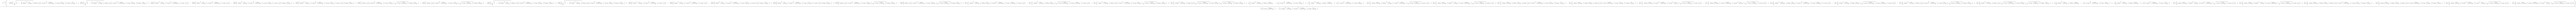

In [221]:
interactions[2][(A, Z1)].subs(g_changes).trigsimp().factor()

In [231]:
for interaction, coeff in interactions[3].items():
    if H10 in interaction:
        display(interaction)

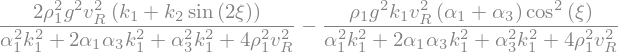

In [241]:
interactions[3][(W1p, W1m, H10)].collect(rho1, lambda x:x.trigsimp().factor())